# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chemi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("news_API")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
topic="Bitcoin"
btc_headlines = newsapi.get_everything(
    q=topic,
    language="en",
    sort_by="relevancy"
)
# Print total articles
print(f"Total articles about {topic}: {btc_headlines['totalResults']}")

Total articles about Bitcoin: 6188


In [5]:
# Fetch the Ethereum news articles
topic="Ethereum"
eth_headlines = newsapi.get_everything(
    q=topic,
    language="en",
    sort_by="relevancy"
)
# Print total articles
print(f"Total articles about {topic}: {eth_headlines['totalResults']}")

Total articles about Ethereum: 2726


In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_sentiment_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_sentiment_df = btc_sentiment_df[cols]

btc_sentiment_df.head()

,date,text,compound,positive,negative,neutral
0,2021-12-29,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...,0.3612,0.077,0.000,0.923
1,2021-12-12,"Image source, AFP via Getty Images\r\nImage ca...",-0.4019,0.000,0.078,0.922
2,2021-12-12,People aren't done hijacking major politicians...,0.5267,0.112,0.000,0.888
3,2021-12-23,Dec 23 (Reuters) - The U.S. Securities and Exc...,0.5859,0.142,0.000,0.858
4,2022-01-07,Between Bitcoin-themed superspreader events an...,-0.3716,0.000,0.074,0.926


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_sentiment_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_sentiment_df = eth_sentiment_df[cols]

eth_sentiment_df.head()

,date,text,compound,positive,negative,neutral
0,2021-12-10,White Castle double cheeseburger.Erin McDowell...,0.0000,0.000,0.00,1.000
1,2021-12-30,"Crypto Street Restaurant, Clearwater Beach, Fl...",-0.1531,0.000,0.06,0.940
2,2021-12-10,"Nicholas Merten , an expert in cryptography, p...",0.4939,0.119,0.00,0.881
3,2021-12-29,CryptoPunksRokas Tenys\r\n<ul><li>NFT sales ha...,0.0000,0.000,0.00,1.000
4,2021-12-20,"Representations of cryptocurrencies Bitcoin, E...",0.0000,0.000,0.00,1.000


In [8]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.104055,0.064500,0.035600,0.899900
std,0.402325,0.066189,0.064489,0.090143
min,-0.862200,0.000000,0.000000,0.665000
25%,-0.010450,0.000000,0.000000,0.852250
50%,0.000000,0.073000,0.000000,0.906500
75%,0.401900,0.117000,0.074000,1.000000
max,0.790600,0.211000,0.266000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.276390,0.088200,0.010650,0.901100
std,0.393864,0.108128,0.027469,0.106049
min,-0.434000,0.000000,0.000000,0.640000
25%,0.000000,0.000000,0.000000,0.824500
50%,0.101150,0.040000,0.000000,0.918500
75%,0.567725,0.149500,0.000000,1.000000
max,0.946000,0.360000,0.102000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Eth has the highest mean positive score, 0.0882.

Q: Which coin had the highest compound score?

A: Eth has the highest compound score, 0.946.

Q. Which coin had the highest positive score?

A: Eth has the highest positive score, 0.36.


---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lem = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words('english')

sw.append("u")
sw.append("it'")
sw.append("'s")
sw.append("n't")
sw.append('…')
sw.append("\`")
sw.append('``')
sw.append('char')
sw.append("''")
sw = set(sw)

print(sw)

{'again', 'didn', 'can', '``', 'you', "you'll", 'doing', 'against', 'weren', "weren't", "aren't", 'once', 'couldn', "'s", 'between', 'myself', 'be', 'so', 'his', 'very', 'their', 'had', 'into', 'other', 'mightn', 've', "don't", 'should', 'll', 'under', 'itself', 'which', 'my', 'them', 'ain', 'it', 'both', 'just', 'don', "mustn't", 'then', 'does', 'on', "hasn't", 'doesn', 'there', "''", 'most', 'for', 'isn', "won't", 'because', 'as', 'wasn', 'was', 'that', 'nor', 'off', 'did', 'or', 'she', 'a', 'yourself', 'such', 'yourselves', 'the', "you've", 'd', 'of', 'about', 're', 'when', 'won', 'too', 'we', 'ma', 'in', 'they', "she's", "it's", "couldn't", 'to', "needn't", 'over', 'than', 'while', 'has', 'whom', 'have', "doesn't", 'having', 'y', 'with', 'who', 'ourselves', 'your', 'some', 'ours', "should've", 'those', 'him', 'hasn', "shan't", 'themselves', 'our', 'by', 'and', 'is', 'own', 'aren', 'its', 'all', "didn't", 'how', 'each', 'during', "n't", 'her', "isn't", 'hers', 'i', 'me', 'wouldn', '

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in sw, words))
    
    # Lemmatize Words into root words
    tokens = [lem.lemmatize(word) for word in words]
    
    return tokens


# Define function - Binoy's inclass demo code around min 56 on video1
###def process_text(article):
   # sw = set(stopwords.words(‘english’))
    #regex = re.compile(“[^a-zA-Z ]“)
    #re_clean = regex.sub(‘’, article)
    #words = word_tokenize(re_clean)
    #lem1 = [lemmatizer.lemmatize(word, wordnet.ADJ) for word in words]
    #lem2 = [lemmatizer.lemmatize(word, wordnet.ADV) for word in lem1]
    #lem3= [lemmatizer.lemmatize(word, wordnet.VERB) for word in lem2]
    #lem4 = [lemmatizer.lemmatize(word, wordnet.NOUN) for word in lem3]
    #output = [word.lower() for word in lem4 if word.lower() not in sw]
    #return output

In [13]:
# Create a new tokens column for Bitcoin
btc_sentiment_df['tokens'] = btc_sentiment_df.text.apply(tokenizer)
btc_sentiment_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-12-29,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...,0.3612,0.077,0.000,0.923,"[Musk.MARK, RALSTON/AFP, via, Getty, Images, E..."
1,2021-12-12,"Image source, AFP via Getty Images\r\nImage ca...",-0.4019,0.000,0.078,0.922,"[Image, source, AFP, via, Getty, Images, Image..."
2,2021-12-12,People aren't done hijacking major politicians...,0.5267,0.112,0.000,0.888,"[People, done, hijacking, major, politician, T..."
3,2021-12-23,Dec 23 (Reuters) - The U.S. Securities and Exc...,0.5859,0.142,0.000,0.858,"[Dec, 23, Reuters, U.S., Securities, Exchange,..."
4,2022-01-07,Between Bitcoin-themed superspreader events an...,-0.3716,0.000,0.074,0.926,"[Bitcoin-themed, superspreader, event, cringey..."


In [14]:
# Create a new tokens column for Ethereum
eth_tokens = []
[eth_tokens.append(tokenizer(text)) for tokens in eth_sentiment_df.text]   
eth_sentiment_df['tokens'] = eth_tokens
eth_sentiment_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-12-10,White Castle double cheeseburger.Erin McDowell...,0.0000,0.000,0.00,1.000,"[Information, popular, cryptocurrency, mining,..."
1,2021-12-30,"Crypto Street Restaurant, Clearwater Beach, Fl...",-0.1531,0.000,0.06,0.940,"[Information, popular, cryptocurrency, mining,..."
2,2021-12-10,"Nicholas Merten , an expert in cryptography, p...",0.4939,0.119,0.00,0.881,"[Information, popular, cryptocurrency, mining,..."
3,2021-12-29,CryptoPunksRokas Tenys\r\n<ul><li>NFT sales ha...,0.0000,0.000,0.00,1.000,"[Information, popular, cryptocurrency, mining,..."
4,2021-12-20,"Representations of cryptocurrencies Bitcoin, E...",0.0000,0.000,0.00,1.000,"[Information, popular, cryptocurrency, mining,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
#btc_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_sentiment_df.tokens]
#dict(btc_bigram_counts[0].most_common(10))

N = 2
grams = ngrams(tokenizer(btc_sentiment_df.text.str.cat()), N)
Counter(grams).most_common(10)

[(('Reuters', 'Bitcoin'), 5),
 (('illustration', 'taken'), 3),
 (('via', 'Getty'), 2),
 (('Getty', 'Images'), 2),
 (('Indian', 'Prime'), 2),
 (('Prime', 'Minister'), 2),
 (('Minister', 'Narendra'), 2),
 (('Narendra', 'Modi'), 2),
 (('Modi', 'Twitter'), 2),
 (('Twitter', 'account'), 2)]

In [17]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth_sentiment_df.text.str.cat()), N)
Counter(grams).most_common(10)

[(('illustration', 'taken'), 3),
 (('White', 'Castle'), 2),
 (('Crypto', 'Street'), 2),
 (('Clearwater', 'Beach'), 2),
 (('Beach', 'Florida'), 2),
 (('li', 'NFT'), 2),
 (('29', '2021'), 2),
 (('2021', 'REUTERS/Dado'), 2),
 (('Reuters', 'Bitcoin'), 2),
 (('char', 'Ethereum'), 2)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(btc_sentiment_df.text.str.cat())
token_count(all_tokens, 10)

[('char', 19),
 ('Bitcoin', 11),
 ('Reuters', 8),
 ('cryptocurrency', 7),
 ('bitcoin', 5),
 ('digital', 4),
 ('Twitter', 4),
 ('market', 4),
 ('would', 4),
 ('2021', 4)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth_sentiment_df.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('2021', 6),
 ('Ethereum', 5),
 ('bitcoin', 4),
 ('Bitcoin', 4),
 ('user', 4),
 ('asset', 4),
 ('brand', 3),
 ('crypto', 3),
 ('announced', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

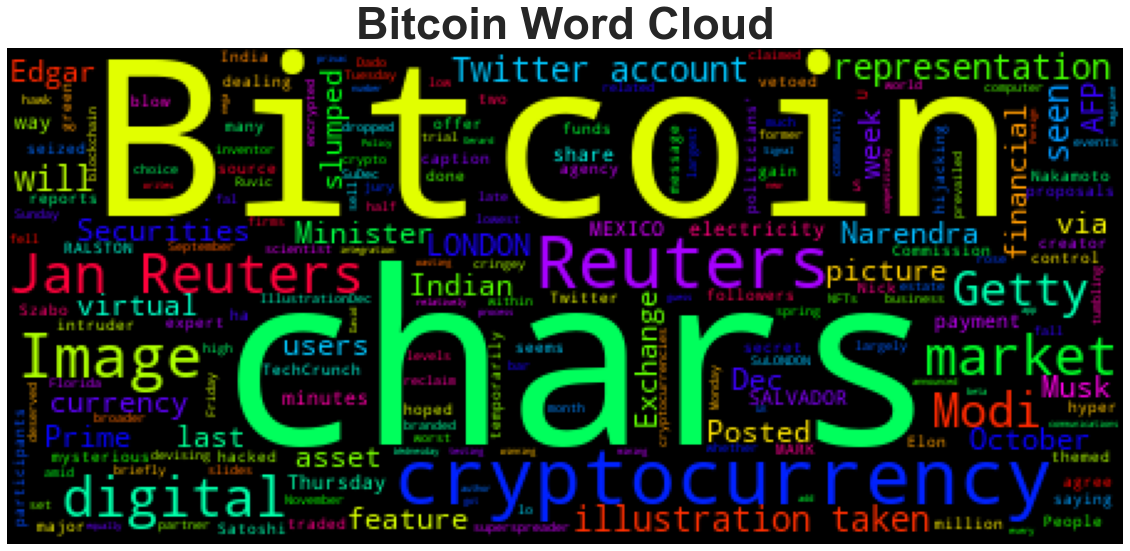

In [49]:
# Generate the Bitcoin word cloud
def wordcloud(text, title=""):
    cloudDF = WordCloud(width=450, colormap='hsv').generate(text)
    plt.imshow(cloudDF)
    plt.axis("off")
    fontdict = {"fontsize": 45, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

wordcloud(btc_sentiment_df.text.str.cat(), title="Bitcoin Word Cloud")

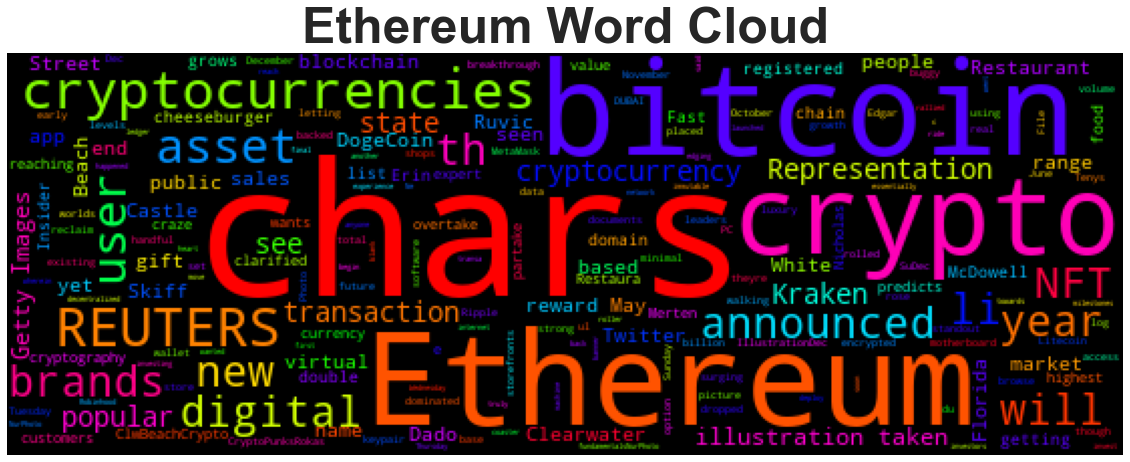

In [23]:
# Generate the Ethereum word cloud
wordcloud(eth_sentiment_df.text.str.cat(), title="Ethereum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
btc_text_concat = btc_sentiment_df.text.str.cat()
btc_text_concat

'Musk.MARK RALSTON/AFP via Getty Images\r\nElon Musk seems to agree with many that hyper-secret cryptocurrency expert Nick Szabo could be Satoshi Nakamoto, the mysterious creator of the digital currency… [+1467 chars]Image source, AFP via Getty Images\r\nImage caption, Modi has has more than 70 million Twitter followers\r\nIndian Prime Minister Narendra Modi\'s Twitter account was hacked with a message saying India ha… [+854 chars]People aren\'t done hijacking major politicians\' Twitter accounts for financial gain. TechCrunch reports an intruder temporarily seized control of Indian Prime Minister Narendra Modi\'s Twitter account… [+1087 chars]Dec 23 (Reuters) - The U.S. Securities and Exchange Commission vetoed two proposals to offer bitcoin exchange-traded funds, dealing a blow to market participants who had hoped the agency would green … [+1769 chars]Between Bitcoin-themed superspreader events and cringey branded NFTs, those within the crypto community have set a high bar for devisi

In [29]:
# Run the NER processor on all of the text
doc = nlp(btc_text_concat)

# Add a title to the document
doc.user_data['title'] = 'BTC NER'

In [30]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [31]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Getty Images ORG
Elon Musk PERSON
Nick Szabo PERSON
Satoshi Nakamoto PERSON
AFP ORG
Getty Images ORG
Modi GPE
more than 70 million MONEY
Twitter PRODUCT
Indian NORP
Narendra Modi's PERSON
Twitter PRODUCT
India GPE
Twitter PRODUCT
TechCrunch ORG
Indian NORP
Narendra Modi's PERSON
Twitter PRODUCT
+1087 chars]Dec 23 DATE
Reuters ORG
The U.S. Securities and Exchange Commission ORG
two CARDINAL
this week DATE
November 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationDec PERSON
12 CARDINAL
Reuters ORG
Sunday DATE
above $50,000 MONEY
Bitcoin PERSON
October 19, 2021 DATE
REUTERS ORG
Reuters ORG
6.13% PERCENT
47,606.92 MONEY
Tuesday DATE
Jan 7 DATE
Reuters ORG
Friday DATE
as much as 5% PERCENT
late September DATE
41,000 MONEY
3.7% PERCENT
this week DATE
Florida GPE
half CARDINAL
Bitcoin PERSON
October 19, 2021 DATE
REUTERS ORG
Jan 10 DATE
Reuters ORG
over 5% PERCENT
Monday DATE
40,000 MONEY
5-month DATE
2.6% PERCENT
40,800 MONEY
the spring of 2021 DATE
Signal ORG
UK GPE
10 minutes or so TIME
Da

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
eth_text_concat = eth_sentiment_df.text.str.cat()
eth_text_concat

"White Castle double cheeseburger.Erin McDowell/Insider\r\nThe list of name brands getting into crypto grows.\xa0\r\nFast food chain White Castle announced on Twitter that it registered a domain name with th… [+1012 chars]Crypto Street Restaurant, Clearwater Beach, Florida.@ClwBeachCrypto/Twitter\r\nA new restaurant in Clearwater Beach, Florida wants more customers to partake in the crypto craze.\r\nCrypto Street Restaura… [+2203 chars]Nicholas Merten , an expert in cryptography, predicts that the digital currency ethereum will overtake bitcoin in the market after reaching its highest value since May 2018. He clarified that these e… [+769 chars]CryptoPunksRokas Tenys\r\n<ul><li>NFT sales have had a breakthrough year, with total sales volume surging to $14 billion in 2021.</li><li>The NFT market is dominated by a handful of standout leaders du… [+2769 chars]Representations of cryptocurrencies Bitcoin, Ethereum, DogeCoin, Ripple, Litecoin are placed on PC motherboard in this illustration

In [33]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text_concat)

# Add a title to the document
eth_doc.user_data["title"] = "ETH NER"

In [34]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [35]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

White Castle FAC
Erin McDowell/Insider PERSON
White Castle FAC
Twitter PRODUCT
Street Restaurant PERSON
Clearwater Beach GPE
Florida.@ClwBeachCrypto/Twitter ORG
Clearwater Beach GPE
Florida GPE
Crypto Street Restaura PERSON
Merten PERSON
May 2018 DATE
Tenys ORG
a breakthrough year DATE
$14 billion MONEY
2021.</li><li CARDINAL
NFT ORG
Bitcoin, Ethereum ORG
DogeCoin ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/File Photo PERSON
DUBAI ORG
early December 2021 DATE
Skiff ORG
MetaMask PRODUCT
Skiff ORG
November 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationDec PERSON
12 CARDINAL
Reuters ORG
Sunday DATE
above $50,000 MONEY
Bitcoin PERSON
October 19, 2021 DATE
REUTERS ORG
Reuters ORG
6.13% PERCENT
47,606.92 MONEY
Tuesday DATE
Getty Images ORG
Cryptocurrencies ORG
Wednesday DATE
50,000 MONEY
Ethereum ORG
Images ORG
a banner year DATE
2021 DATE
the new year DATE
Crypto PERSON
2021 DATE
chars]NurPhoto/Getty Images ORG
Robinhood ORG
Thursday DATE
seven CARDINAL
Ethereum ORG
NFT ORG
32 CARDINAL

---